# Fourier Series

In [1]:
import math
import seaborn
import numpy as np
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The Fourier series is an expansion of a function f(x) in terms of an infinite sum of sines and cosines.

For a general function f(x), the Fourier series is

$$
f(x) = a_0 + \sum_{n=1}^{\infty} a_n\ cos(nx) + \sum_{n=1}^{\infty} b_n\ sin(nx)
$$

where the coefficients are

\begin{align*}
a_0\ &=\ (\frac{1}{2\pi}) \int_{-\pi}^{\pi} f(x)\ dx \\
\\
a_n\ &=\ (\frac{1}{\pi}) \int_{-\pi}^{\pi} f(x)\ cos(x) dx \\
\\
b_n\ &=\ (\frac{1}{2\pi}) \int_{-\pi}^{\pi} f(x)\ sin(nx) dx
\end{align*}

The general Fourier series can also be written in the complex form

$$
f(x) = \sum_{n=-\infty}^{\infty} c_n\ exp(inx)
$$

where the coefficients are

$$
c_n = (\frac{1}{2\pi}) \int_{-\pi}^{\pi} f(x)\ exp(-inx)\ dx
$$

## Example 1: Piecewise/Sawtooth Function

Consider a periodic sawtooth function

\begin{align*}
f(x)\ &=\ \frac{x}{\pi},\ \textrm{for}\ -\pi < x < \pi, \\
\\
f(x + 2 \pi k)\ &=\ f(x),\ \textrm{for}\ -\pi < x < \pi\ \textrm{and}\ k \in \mathbb{Z} \\
\\
\end{align*}

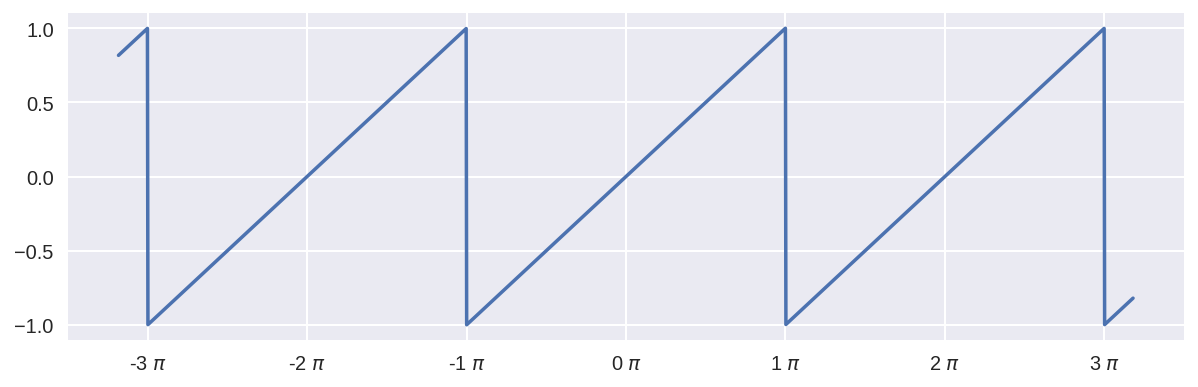

In [2]:
def sawtooth(x, L):
    return ((x + L) % (L * 2)) / L - 1

T_ex1 = 2 * math.pi
L_ex1 = T_ex1 / 2

# Show function over -10 <= x <= 10
x_ex1 = np.arange(-10, 10, 0.01)
y_ex1 = [sawtooth(x, L_ex1) for x in x_ex1]

fig_ex1, ax_ex1 = plt.subplots(1)
ax_ex1.grid(True)
ax_ex1.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
fig_ex1.set_size_inches(10, 3)
ax_ex1.plot([x / np.pi for x in x_ex1], y_ex1);

The Fourier coefficients are

$$
a_n = \frac{1}{\pi} \sum_{-\pi}^{\pi} f(x)\ cos(nx)\ dx
$$

\begin{align*}
b_n &= \frac{1}{\pi} \sum_{-\pi}^{\pi} f(x)\ sin(nx)\ dx \\
&= \frac{ 2(-1)^{n+1} }{ \pi n }
\end{align*}


Since $ f(x) \equiv x $ is odd, the $ a_n $ coefficients are all 0, and the series is the partial sum of the sine terms.

Let's use plain Python to perform an approximation:

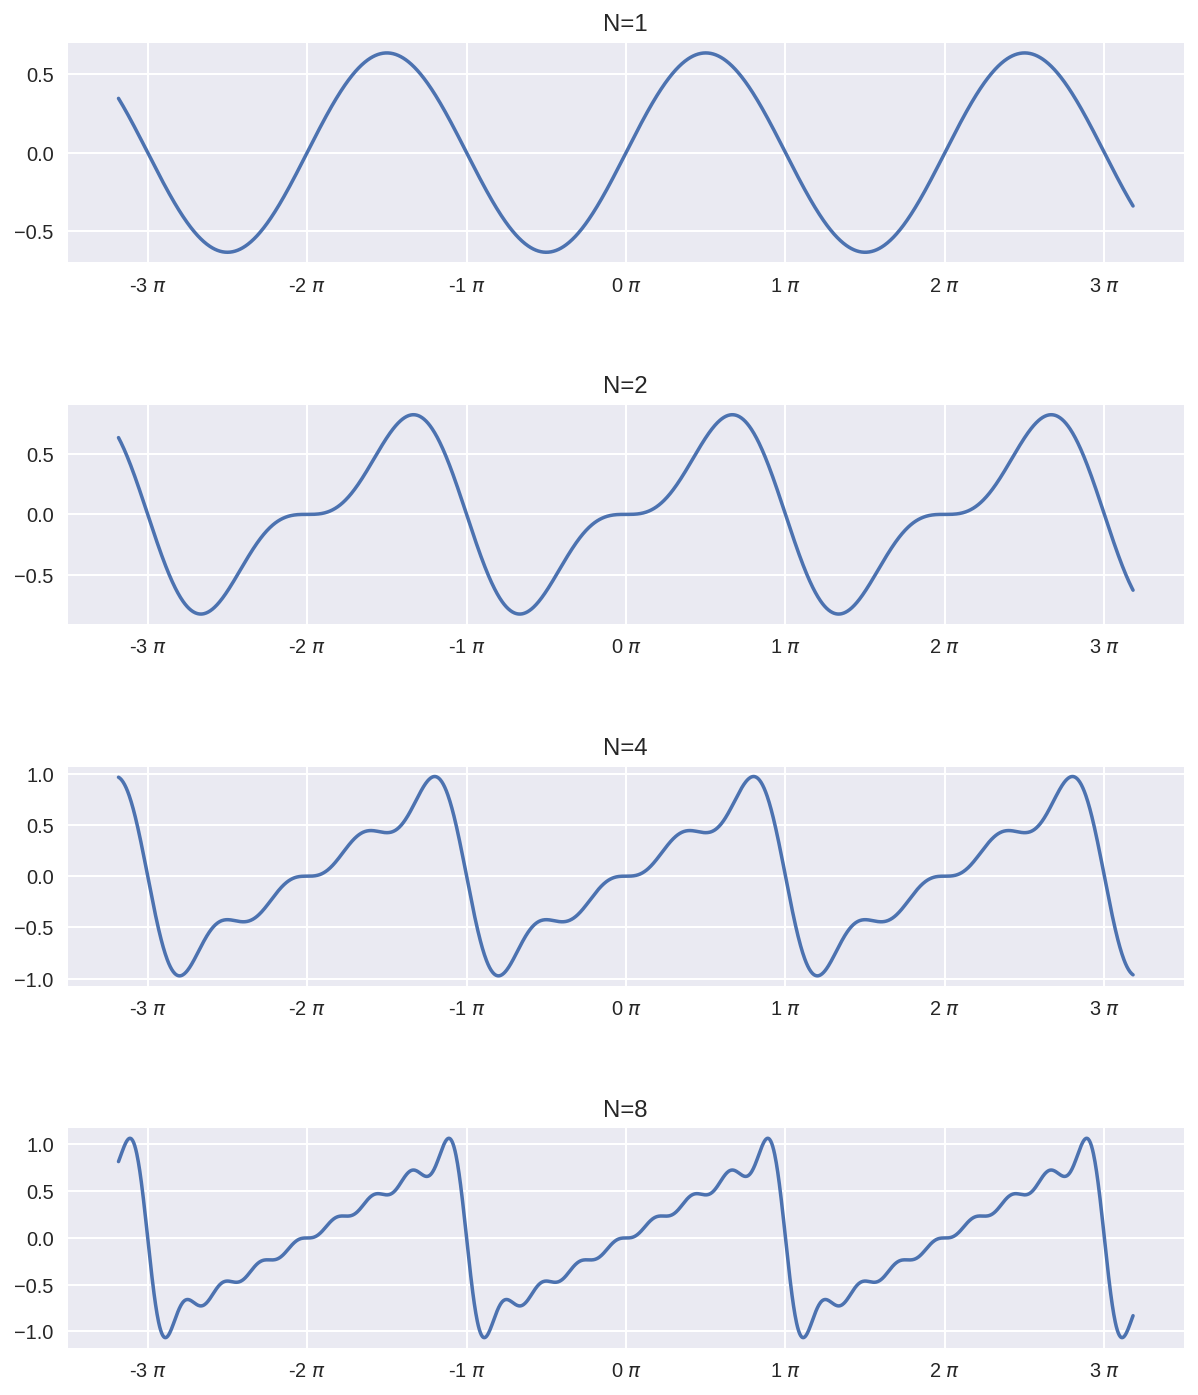

In [3]:
def b_n(n):
    return 2 * pow(-1, n+1) / (np.pi * n)

def fourier(x, N = 1):
    s = 0
    for n in range(1, N + 1):
        s += b_n(n) * np.sin(n * x)
    return s
              
fig2_ex1, ax2_ex1 = plt.subplots(4)
fig2_ex1.set_size_inches(10, 12)
fig2_ex1.subplots_adjust(hspace=.65)

for N in [1, 2, 4, 8]:
    ax = ax2_ex1[int(math.log(N, 2))]
    ax.grid(True)
    ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax.set_title('N=%d' % N)
    ax.plot([x / np.pi for x in x_ex1], [fourier(x, N) for x in x_ex1]);

Above, we can see the partial sums and the effects of increasing N.

Also, note that the Fourier partial sum overshoots f(x) near the discontinuities. This is known as Gibbs' Phenomenon.

## Example 2: Half-Wave Rectifier

A [rectifier](https://en.wikipedia.org/wiki/Rectifier) is a device that converts AC current to DC current, and a half-wave rectifier is one that blocks either the negative or positive half of the AV wave.

<a title="By Wdwd (Own work) [GFDL (http://www.gnu.org/copyleft/fdl.html) or CC BY 3.0 (http://creativecommons.org/licenses/by/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3AHalfwave.rectifier.en.svg"><img width="512" alt="Halfwave.rectifier.en" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Halfwave.rectifier.en.svg/512px-Halfwave.rectifier.en.svg.png"/></a>

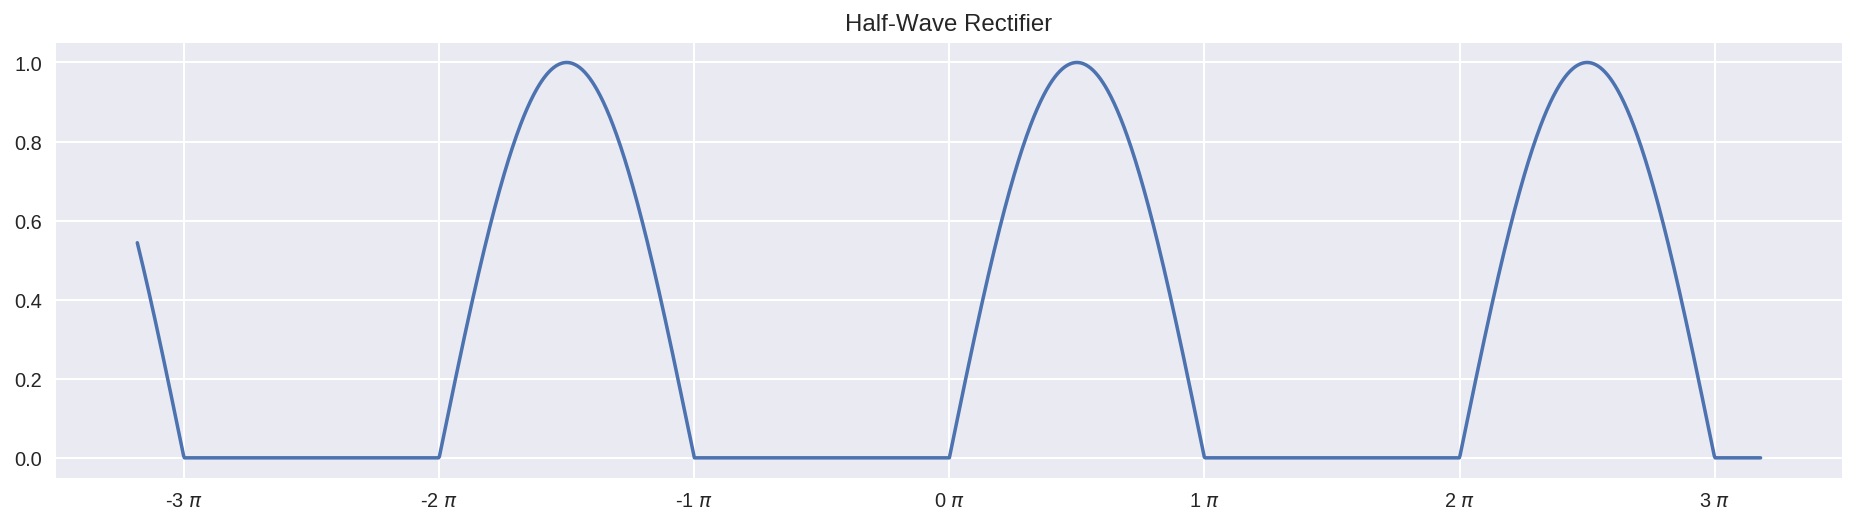

In [4]:
def hwr(x, L):
    y = math.sin(x)
    return y if y > 0 else 0

T_ex2 = 2 * math.pi
L_ex2 = T_ex1 / 2

# Show function over -10 <= x <= 10
x_ex2 = np.arange(-10, 10, 0.01)
y_ex2 = [hwr(x, L_ex2) for x in x_ex2]

fig_ex2, ax_ex2 = plt.subplots()
ax_ex2.grid(True)
ax_ex2.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax_ex2.set_title('Half-Wave Rectifier')
fig_ex2.set_size_inches(16, 4)
ax_ex2.plot([x / np.pi for x in x_ex2], y_ex2);

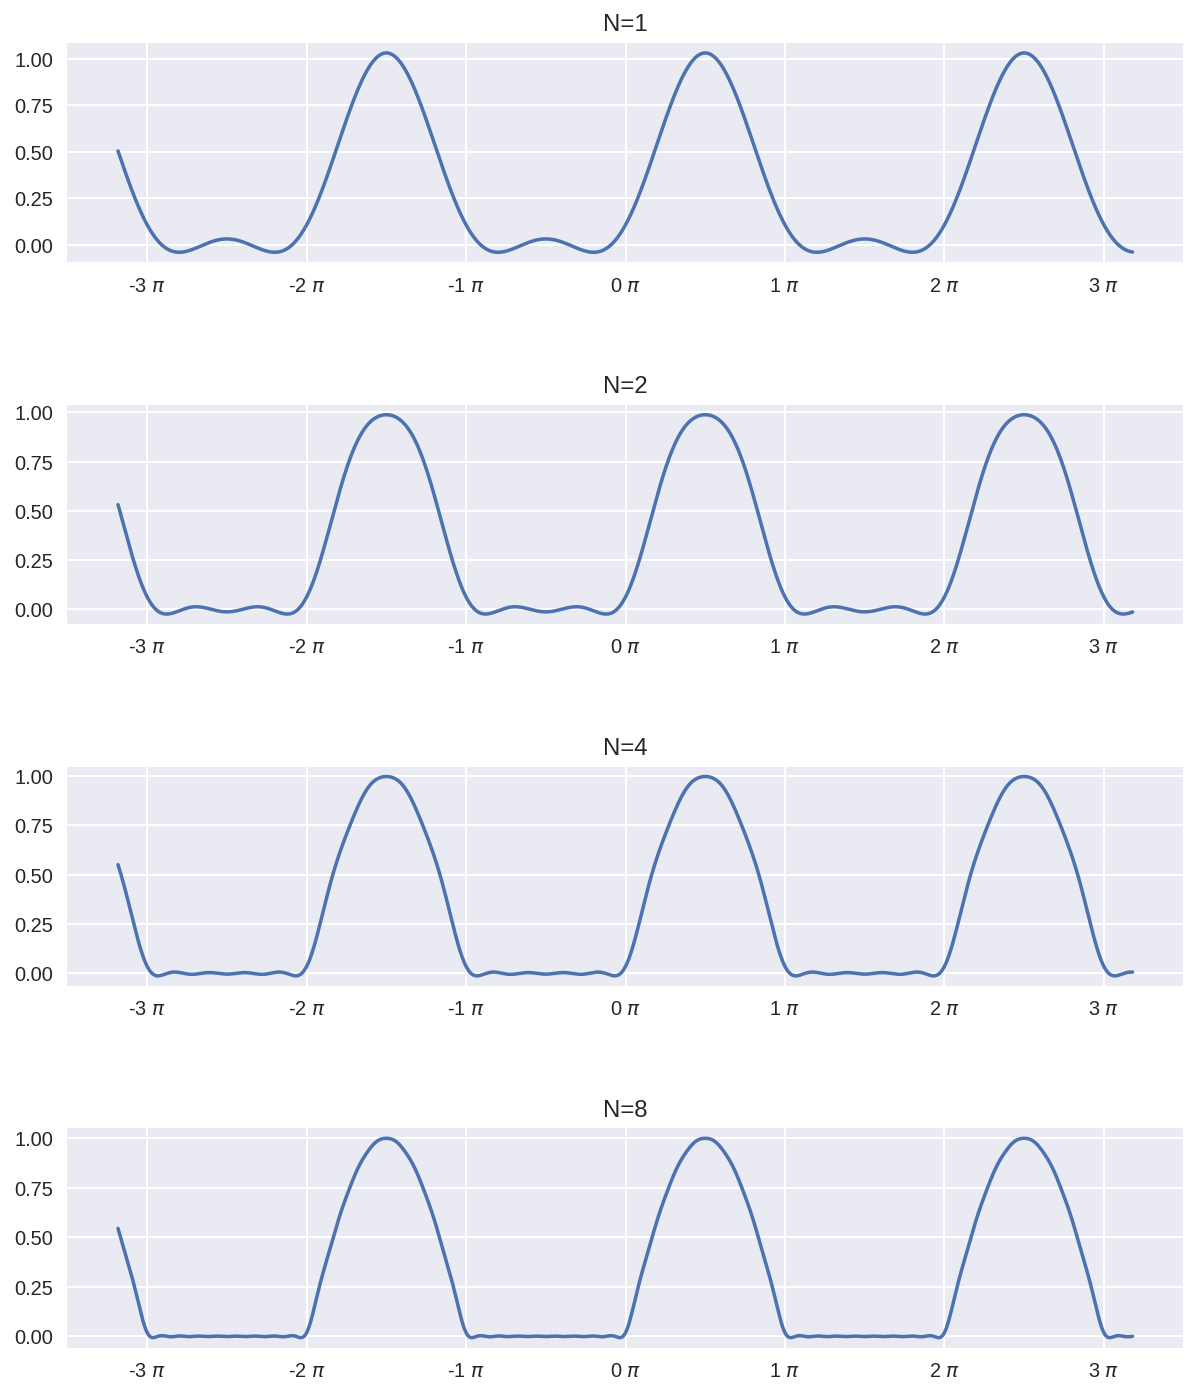

In [6]:
def a_n2(n, x):
    return math.cos(2 * n * x) / (4 * pow(n, 2) - 1)

def fourier2(x, N = 1):
    a0 = 1 / math.pi
    s1 = (1/2) * math.sin(x) 
    s2 = 0
    for n in range(1, N + 1):
        s2 += a_n2(n, x)
    return a0 + s1 - ((2/math.pi) * s2)
              
fig2_ex2, ax2_ex2 = plt.subplots(4)
fig2_ex2.set_size_inches(10, 12)
fig2_ex2.subplots_adjust(hspace=.65)

for N in [1, 2, 4, 8]:
    ax = ax2_ex2[int(math.log(N, 2))]
    ax.grid(True)
    ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax.set_title('N=%d' % N)
    ax.plot([x / np.pi for x in x_ex2], [fourier2(x, N) for x in x_ex2]);

Above, we can see that the series converges more quickly than with the sawtooth function, because the half-wave rectifier is more continuous.